<a href="https://colab.research.google.com/github/VictorLequertier/Portfolio/blob/main/DataMining_Final_Assignment_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Final Assignment - Victor Lequertier - 59544

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import kneed

# 1. Understanding the methods and concepts of the course

## 1. Finding outliers

### a) Explain in details your approach to detect those stores.

We wan't to detect the stores that are not performing well, i.e the bottom outliers. This is an **univariate analysis** problem because we only have data on the quantity sold. 

To answer this type of problem, we can use an outlier detection based on a treshold. We have two options to set this treshold:

- Using the mean and the standard deviation $$\lvert \frac{x_i-\hat{\mu}}{\hat{\sigma}}\rvert> 2 $$

- Using the Median and the MAD $$\lvert \frac{x_i-Median}{1.48MAD}\rvert> 2 $$

We know that the second one has the advantage, compared to the first one, to be robust to outliers.  
In this case, it is particullary important. Indeed, we can think that if some stores are performing really well, this will result in rising the mean by a lot and then this would also higher the treshold. Consequently, a treshold based on the mean and std would not be really consistent as it would likely concider some "low but normal individuals" as bottom outliers, something that we don't want to happen.   

Thus, we should concider using the Median and the MAD to build our treshold. Then we can consider all values below this threshold as bottom outleirs and thus as stores that are selling very small quantities

---

### b) Is your approach based on some statistical assumptions ? Detail your answer.

Yes, this approached is based on the standard assumption that observations in our sample are realizations of a normal distribution 
(If necessary we also can consider using a transformation to make it look like a normal distibution)

This assumption can be made if we consider a large enought pool of data (such as N ≥ 30 for example) 

---

### c) What are the advantages of using an outlier detection method compared to a method that consists of sorting the series in ascending order and then of taking the 5% smallest values ?

Outliers are by definition abnormal values. We don't wan't to remove data only because they are in the bottom 5%. Indeed values can be in the bottom 5% but still be normal, let's take an example:

If we consider a 100 students class where 2 student have the grade of 10/20, 49 students have the grade of 15/20 and the last 49 have a grade of 16/20.
With this data we have $\hat{\mu} = 15,39$ and $\hat{\sigma} = 0.92$, so all our students with a grade of 15 or 16 considered as normal values (using the tresholds), and only the two students with a 10/20 grade are outliers.  
However by taking the 5% lowest graded students we would remove from the dataset 3 students that have a grade of 15/20 which are obviously not abnormal values.

To put it in a nutshell: We only want to detect values that are **out of normality**, and to do so we must use a statistical criteria (as the outlier detection method discussed earlier).

---

## 2. Let us denote the ith observation of K variables as xi = (x1,i, x2,i, . . . , xK,i). For detecting outliers, we compute the Mahanalobis distance for each observation i = 1, ...,N. We end up with N different values of the squared Mahanalobis distance (denotedby dMan(xi, ˆμ)2 for the ith observation).

### a) Explain how to choose a threshold value to assess if an observation is an outlier. On which statistical assumption do you rely to set the threshold ?

When we use the Mahalanobis distance, we set the treshold to a certain quantile of the $\chi²(K)$ distribution, where K, (the degree of freedom of the $\chi²$) is equal to the number of independant variables of our dataset.  
Concretly this means we need to look into the $\chi²$ law's *abaque* (distribution table) for the cell that corresponds to the wanted quantile and the correct number of degrees of freedom    

This treshold relies on the statistical assumption that our rescaled data observations follow a N dimensional normal distribution

---

### b) What would be the threshold value using a 99% quantile of the chi-squared distribution if the number of variables amounts to K = 10 ?

We just need to look into the"*abaque*" (distribution table) of the $\chi²$ distribution for the 99% quantile column and K=10 row

![image.png](attachment:5bc33688-8e65-4763-bd8a-cc92071d56db.png)

According to the table the treshold value would be **2.558**

---

## 3. Clustering: sing the Euclidean distance, we compute the proximity matrix of 5 individuals

### a) Can the matrix Prox be a proximity matrix ? If not, fix the problem.

By definition, a proximity matrix has to be an *Hollow matrix*, which means it has to be symetric and the diagonal must be filled with zeros only, this is not the case here. To "fix" it, we must replace the diagonal with zeros so we have the following matrix:

$$ \begin{bmatrix}
0 & 50.01 & 195.00 & 122.01 & 61.00 \\
50.01 & 0 & 245.00 & 172.00 & 11.05 \\
195.00 & 245.00 & 0 & 73.00 & 256.00 \\
122.01 & 172.00 & 73.00 & 0 & 183.01 \\
61 & 11.05 & 256.00 & 183.01 & 0 
\end{bmatrix}  $$

---

### b) Using the bottom-up approach of the hierarchical clustering method, we start with five different clusters. Then, we merge the second individual with the fifth individual. Using the single-linkage hierarchical clustering method, how does the proximity matrix look like after merging these two individuals ?

After merging these two individuals we obtain the following matrix:

$$ \begin{bmatrix}
0 & 50.01 & 195.00 & 122.01 \\
50.01 & 0 & 245.00 & 172.00 \\
195.00 & 245.00 & 0 & 73.00 \\
122.01 & 172.00 & 73.00 & 0 \\
\end{bmatrix}  $$

---

### c) The characteristics of the five individuals that were used to build the proximity matrix are the GMAT and the GPA (see the excel file ’admission xlsx.xlsx’ for an example of those variables). Which distance metric would you advise to build the proximity matrix ?

In [ ]:
data_adm = pd.read_excel('admission_xlsx.xlsx')
data_adm.head()

,GPA,GMAT,De
0,2.96,596,admit
1,3.14,473,admit
2,3.22,482,admit
3,3.29,527,admit
4,3.69,505,admit


We have a bi-dimensional problem with numerical values in both dimensions, to compute the distance beteen points and build the proximity matrix we have the choice between Euclidian Distance , Standardized Euclidian Distance and Mahalanobis distance (or others less frequent distances but let's stick to these 3).  
We see that GPA and GMAT don't follow the same scale, GPA is graded on 4 and GMAT on 800, consequently we can't use the Euclidian distance as it vary a lot with variable scales.

Thus we can already say Mahalanobis and Standardized distance correct this problem and so on they are two correct solutions.    

However the advantage of Mahalanobis distance is to take account of correlation between variables. Here we only have two variables so it may be bit overkilled and to heavy compared to the Standardized ED

## 4) You want to invest some money into the financial market but you do not know how to choose the assets

### a) If you have to invest only in one asset, in which company will you invest? Discuss your answer.

To have a better sight of the data, let's plot Netflix (in red) and Blackrock (in... Black) Financial Returns over the last 5 months

In [1]:
invest_df = pd.DataFrame({"Date" : ['Jun.', 'Jul.', 'Aug.', 'Sept.', 'Oct.'], "Netflix" : [0.5, -2.5, -1, 1, 2], "Blackrock" : [2, -1, -2, 1.5, 1]})

NameError: ignored

In [ ]:
print("mean of Netflix : ",invest_df.loc[:,"Netflix"].mean()," | std of Netlix : ", invest_df.loc[:,"Netflix"].std(ddof=1))
print("mean of Blackrock : ",invest_df.loc[:,"Blackrock"].mean()," | std of Blackrock : ", invest_df.loc[:,"Blackrock"].std(ddof=1))


At a first glance it looks like Blackrock has an higher mean return on investment and a lower std compared to netflix. 
So it may be a better investment.


Just let's not forget that mean and std are not overall good indicators because time plays a huge role.

So if we take into concideration the timeframe here is what we have:

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.lineplot(x = invest_df['Date'], y = invest_df['Netflix'], color = "red")
ax = sns.lineplot(x = invest_df['Date'], y = invest_df['Blackrock'], color = "black")
ax.set_ylabel('Financial returns (in %)')

Even if Blackrock was higher than Netflix in general and during for 3 out of the 5 months, it seems that Netflix has been on a more constant growth than Blackrock during the last 3 months. 

To conclude std and means tells that we should go for Blackrock, however, recent results tend to say Netflix is a better bet for the future. Anyway these are clearly insufisant materials to take a real decision on a reliable investment and it would be more a gambling than a educated choice to choose with this only data.  

---

### b) You want to invest in both assets. What are the weights (i.e., the proportion of your wealth invested in both assets) that minimize the portfolio variance ? Detail your computation.

The portfolio variance is given by the following formula: $$Portfolio \: Variance = w_1²\sigma_1² + w_2²\sigma_2² + 2w_1w_2Cov_{1,2}$$
- $w_i$ is the weight of the ith asset
- $\sigma_i²$ is the variance of the ith asset
- $Cov_{1,2}$ is the covariance between assets 1 and 2

First let's try to plot the variance according the Netflix weight in the portfolio to look for a minimum:

In [ ]:
V, WB, WN = [], [], []
wN = 0
wB = 1

cov_m = invest_df[["Netflix", "Blackrock"]].cov()
cov = cov_m.iloc[0][1]
varN = cov_m.iloc[0][0]
varB = cov_m.iloc[1][1]

for i in range(0,1000):
    wN = i/1000
    wB = 1 - i/1000
    WN.append(wN)
    WB.append(wB)
    V.append((wN**2)*varN + (wB**2)*varB + 2*wN*wB*cov)


fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.scatterplot(x = WN, y = V)
ax.set_ylabel('Portfolio Variance')
ax.set_xlabel('Weight of Netflix assets in the Portfolio')

We can see the minimum variance seems to be arround a weight of 45 for Netflix asset. To get a more precise results let's use scipy to build a minimize optimizer 

In [ ]:
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
cov_m = invest_df[["Netflix", "Blackrock"]].cov()
cov = cov_m.iloc[0][1]
varN = cov_m.iloc[0][0]
varB = cov_m.iloc[1][1]
def objective(W):
    wN = W[0]
    wB = W[1]
    return((wN**2)*varN + (wB**2)*varB + 2*wN*wB*cov)

def constraint(W):
    return(1 - (W[0] + W[1]))
W0 = [0.5,0.5]
bound = (0,1)
bounds = (bound, bound)
constraints = [{"type": "eq", "fun": constraint}]

In [ ]:
solution = minimize(objective, W0, method = "SLSQP", bounds = bounds, constraints = constraints)

In [ ]:
solution.x

So the portfolio with the minimum variance is obtained by investing **44.44% of the wealth in Netflix and 55.56% in Blackrock**

---

## 5) We apply the principal component analysis on a dataset

### a) What is the number of variables in the dataset ?

We now that the number of principal components is less than or equal to the number of original variables so we can only say we have **5 or more variables in the dataset**

However here, if we we can see that each principal component is different from the others because each $\lambda$ multiplicity is only equal to 1. Consequently that means our matrix dimension is equal to the number of principal components and thus we have 5 variables in the dataset 

---

### b) What is the sum of the variance of all the variables in the dataset ?

Each eigenvalue gives the variance of the data explained along the related eigenvector. Also, the sum of eigenvalues equals the matrix trace, i.e the sum of the variables variances.  
Thus if we keep all eigenvalues we get the total variance of the dataset and the sum of the variance of the dataset is equal to:   
$$3.64+3.34+2.59+0.23+0.02 = 9.82$$

--- 

## 6) In the linear regression framework, we minimize the sum of squared residuals (i.e. $\sum^N_{i=1}\hat{\epsilon_i}²$) to obtain the OLS formula: $\hat{\beta} = (X'X)^{-1}X'y$

### a) Assuming a simple linear regression framework, yi = β0 + β1xi + ϵi, explain (in words or in math) why we cannot estimate β0 and β1 by optimizing the sum of residuals such that the sum is equal to zero (i.e., setting  $\sum^N_{i=1}\hat{\epsilon_i}² = 0$) 

Let's consider we have $\sum^N_{i=1}\hat{\epsilon_i}² = 0 $    <=> (1)

then because all $\epsilon_is$ are squared we now that for all i $ \hat{\epsilon_i}² >= 0 $   <=> (2)

Thus Given (1) and (2), all $\epsilon_is$ are at the same time positive and their sum is equal to 0, so we can say that for all i we have $ \hat{\epsilon_i}² = 0 $ 

This means for all i we have  $\hat{y_i} = y_i$ which is impossible except if our dataset represent the whole possible observations.

Turing it differently with words if the sum of **squared** residuals is equal to 0 that means each residual is exactly equal to 0 and thus the estimated values of y are exactly equal to the real ones. Thus this is impossible in real life and we can't estimate $\beta_0$ and $\beta_1$ this way




---

## b) Explain why we should not compare two linear models exhibiting different number of explanatory variables using the coefficient of determination.

By definition, the coefficient of determination R² is a an increasing function of the number of variables. This means if we increase the number of variables of a linear model we would automatically get a larger (or at least equal) R²  without really knowing if the model is better.


Thus if we wan't to compare two models with different numbers of explanatory variables, the R² isn't a good indicator (instead we could consider using the Adjusted R² which includes a penalty term acoording to the number of variables)  


---

---

# 2. Application and interpretations

## 1. We estimate a Logit model given by $P[K_i = 1|x_i]  =  f(\beta_1 + \beta_2x_{i2} + \beta_3x_{i,3} + \beta_4x_{i,4})$

### a) What are the significant variables ?

We can find significant variables by looking at the Z statistic and compare its absolute value to 1.96. Each variable is significant if |Z|>1.96
Given the provided python output, we can say that **all the variables are significant** 

---

### b) If the average price of an application increases, what would be the impact on the probability of this app to become popular (i.e., a ’killer’ app)

We can see that $\beta_{avprice} = 0.2755 > 0$, so if the average price increases, the probability that the app will become popular increases also. 

---

### c) Does the Logit model improve over the unconditional probability model (i.e., a model with a constant and no explanatory variables) ? Explain your answer.

We can see that $LRR$ $p-value = 8x10^{-147} <<  0.05$ so we can strongly **reject the Null Hypothesis** $H_0$ that says the model isn't performing better than the empty model (with no explanatory variables).

Conclusion: **The model is performing better** than the unconditional probability model

---

### d) Predict the probability of an application to become popular if the application has an average rating of 3, an average price of 10 dollars and an average size of 30. Give also the formula that has been used to obtain this prediction.

We now that the logistic function is given by $$f(\beta_1 + \beta_2x_{i2} + \beta_3x_{i,3} + \beta_4x_{i,4}) = \frac{exp(\beta_1 + \beta_2x_{i2} + \beta_3x_{i,3} + \beta_4x_{i,4})}{1 + exp(\beta_1 + \beta_2x_{i2} + \beta_3x_{i,3} + \beta_4x_{i,4})}$$

Given the python output, we have: $$P[K_i = 1|x_i]  =  f(-5.0502 + 0.5398x_{i2} + 0.2755x_{i,3} + 0.0122x_{i,4})$$

Now if we replace the $x_i$ with the provided values we have $$P[K_i = 1|\begin{bmatrix}3 \\10 \\30\end{bmatrix} ]  =  f(-5.0502 + 0.5398*3 + 0.2755*10 + 0.0122*30) \approx -0.3098$$

Then, $$P[K_i = 1|\begin{bmatrix}3 \\10 \\30\end{bmatrix} ] \approx \frac{exp(-0.3098)}{1 + exp(-0.3098)} \approx 0.4232$$

Thus, if the application has an average rating of 3, an average price of 10 dollars and an average size of 30, the probability that the application become popular is equal to 42.32%

---

### e) Using the Logistic regression, Figure 2 shows the Top Lift from 10% up to 100%. Interpret the value of the Top Lift 20%.

The lift is a measure of the effectiveness of a predictive model, it is the ratio between the results obtained with and without the predictive model.

In the Figure 2 we can see that $Lift_{20\%} \approx 2.7$, this means that if we take the top 20% individuals predicted as the more likely to be popular, we will end with 2.7 times more real popular apps compared to if we randomly picked the same number of individuals.

---

## 2. Using the k-nearest neighbors (k-NN) algorithm with k = 5 and the leaveone-out cross-validation, we obtain the following confusion matrix:

$$\begin{bmatrix}
6991 & 157 \\
425 & 110 
\end{bmatrix}$$

### a) What are the false Positive rate and false Negative rate ?

$False Positive Rate = \frac{157}{157+6991} = 2.196\%$  
$False Negative Rate = \frac{425}{425+535} = 79.469\%$

---

### b) What is the percentage of correctly classified observations ?

$PCC = \frac{6991 + 110}{6991+110+425+157} = 92.425\%$

### c)Does the k-nearest neighbors algorithm achieve good predictive performance knowing that the unconditional probability of being a popular application amounts to 7% ? Discuss your answer

#### IDEA 1: 

Observed probability of being popular in our model : $\frac{(True Positive + False Negative)}{\sum observations} = \frac{110 + 425}{6991 + 110 + 425 + 157} = 6.96\% \approx 7\% = $ Unconditional probability of being popular   
We can see that the knn algorithms achieve a quite good performance as there is only a 0.04% difference between the unconditional probabily and the observed one to be popular

---

# 3. Dealing with a new dataset

## 1. (4 points) Using a threshold of 99%, how many outliers in the ’call prices’ variable do you detect ?

The goal of this study is to detect outliers in the "Call prices", Let's start by loading the data and by exploring thevariables

In [ ]:
data = pd.read_excel('Heston.xlsx')
data.head()

,Call prices,V0,kappa,theta,sigma,rho,eta_v,rf,div,S0/K,K
0,212.141698,0.200964,1.420514,0.045327,0.351032,-0.785362,2.578626,0.004267,0.016647,0.941205,1081.359606
1,161.392055,0.081932,3.793793,0.148667,0.478834,-0.667770,1.772136,0.003402,0.016843,0.996335,1022.346595
2,189.794643,0.315170,2.550678,0.153142,0.670517,-0.863541,1.075570,0.003402,0.016843,0.996335,1022.346595
3,233.854785,0.198568,2.372794,0.125230,0.391908,-0.314705,1.448928,0.004267,0.016647,1.119270,909.325123
4,310.234380,0.458927,1.319144,0.071194,0.537245,-0.595690,2.578069,0.003402,0.016843,0.885631,1150.139919


In [ ]:
data.describe()

,Call prices,V0,kappa,theta,sigma,rho,eta_v,rf,div,S0/K,K
count,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000,79999.000000
mean,183.747420,0.249864,2.557558,0.105094,0.524190,-0.640200,1.547871,0.003224,0.017307,1.021105,930.610388
std,76.546376,0.143698,1.412883,0.054769,0.274082,0.196203,0.837744,0.001199,0.000670,0.093590,113.635015
min,0.314008,0.000003,0.100076,0.010001,0.050001,-0.979996,0.100142,0.001788,0.016647,0.885631,755.798269
25%,130.615154,0.126462,1.338537,0.057594,0.286074,-0.809767,0.815462,0.001788,0.016647,0.923298,860.770251
50%,178.922685,0.249496,2.554657,0.105117,0.524386,-0.640078,1.551731,0.003402,0.016843,0.996335,909.325123
75%,228.848006,0.374550,3.782978,0.152376,0.761830,-0.470897,2.275841,0.004267,0.017790,1.119270,1022.346595
max,590.628803,0.499998,4.999986,0.199996,0.999965,-0.300002,2.999999,0.005263,0.018734,1.138669,1150.139919


First thing to notice is the fact that div and rf (risk-free rate) are both between 0 and 1 which is a confirmations they represent rates. 

Let's define our regressor variables:

Before applying a outlier detection methode let's look at the Call price variable repartition

C:\Users\victo\miniconda3\envs\pyEDHEC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


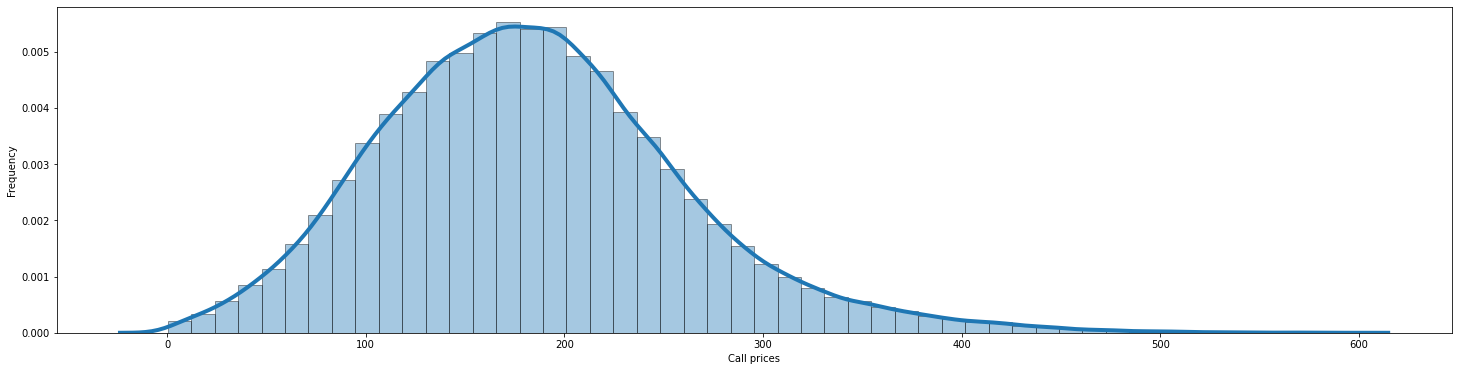

In [ ]:
## Plotting Histogram
fig, ax = plt.subplots(figsize=(25, 6))
sns.distplot(data['Call prices'], hist=True, kde=True, bins=50, hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})    
plt.xlabel("Call prices")
plt.ylabel("Frequency")
plt.show()

Data seems normally distributed but also a bit right-skewed, we should maybe try considering using a log transformation:

We just take a look at the distribution after a log transformation

C:\Users\victo\miniconda3\envs\pyEDHEC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


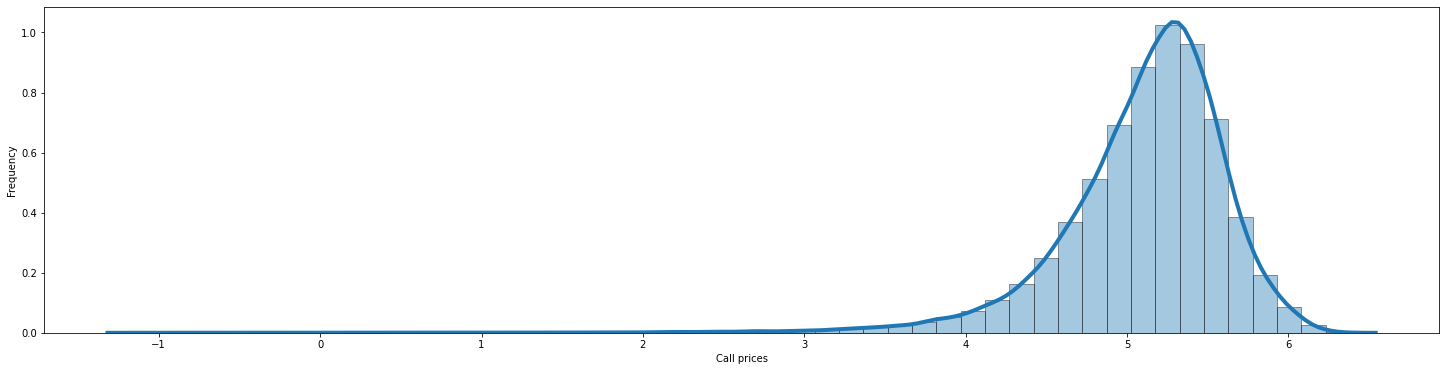

In [ ]:
## Plotting Histogram
fig, ax = plt.subplots(figsize=(25, 6))
sns.distplot(np.log(data['Call prices']), hist=True, kde=True, bins=50, hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})    
plt.xlabel("Call prices")
plt.ylabel("Frequency")
plt.show()

In [ ]:
log_data = data.copy()
log_data['log_call_prices'] = np.log(data['Call prices'])

This doesn't look better, let's stick to the normal data

---

We want to detect outliers on a single variables, so this is a **univariate** outliers detection problem. We have the choice between using a threshold based on mean and standard deviation or the Median and the MAD. Because we wan't a threshold of 99% we will respectivelly use the conditions $\lvert \frac{x_i-\hat{\mu}}{\hat{\sigma}}\rvert> 2.58 $ and $\lvert \frac{x_i-Median}{1.48MAD}\rvert> 2.58 $

In [ ]:
def get_mean_MAD(df, var):
    mean = df[var].mean()
    median = df[var].median()
    std = df[var].std()
    MAD = abs(df[var] - df[var].median()).median()
    return(mean, std, median, MAD)

In [ ]:
def test_outliers(df, var, method):
    if method == 'mean':
        df_out = df.copy()
        df_out['is_outlier'] = (abs((df[var] - mean)/std) > 2.58)
        return(df_out['is_outlier'])
    elif method == 'median':
        df_out = df.copy()
        df_out['is_outlier'] = (abs((df[var] - median)/(1.48*MAD)) > 2.58)
        return(df_out['is_outlier'])
    else:
        print("Method should be either 'mean' (for mean and Std) or 'median' (for median and MAD)")
        return()


In [ ]:
def plot_threshold(df, var, method):
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.scatterplot(x = df.index, y = df[var])
    if method == 'mean':
        min_bar = mean - 2.58*std
        max_bar = mean + 2.58*1.48*std
        print("With a 99% threshold based on the Mean and the Std we detect {} outliers".format(mean_outliers.sum()))
    elif method == 'median':
        min_bar = median - 2.58*1.48*MAD
        max_bar = median + 2.58*1.48*MAD
        print("With a 99% threshold based on the Median and the MAD we detect {} outliers".format(median_outliers.sum()))
    else: 
        print("Method should be either 'mean' (for mean and Std) or 'median' (for median and MAD)")
        return()
    
    plt.axhline(y= min_bar , c='red', lw=1, linestyle='dashed')
    plt.axhline(y= max_bar , c='red', lw=1, linestyle='dashed')

    plt.show() 


Let's start keeping the distribution as it is without applying any transformation:

In [ ]:
mean, std, median, MAD = get_mean_MAD(data, 'Call prices')
print(' Mean =', mean,  '    |    STD = ', std, '\n','Median =', median, '    |    MAD = ', MAD,)
mean_outliers = test_outliers(data, 'Call prices', 'mean')
median_outliers = test_outliers(data, 'Call prices', 'median')

 Mean = 183.7474201740198     |    STD =  76.54637602972059 
 Median = 178.92268485030485     |    MAD =  49.08570810773267


With a 99% threshold based on the Mean and the Std we detect 1240 outliers


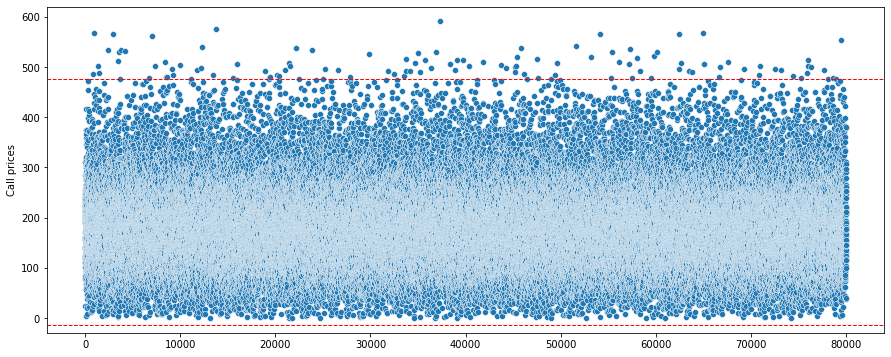

In [ ]:
plot_threshold(data, 'Call prices', 'mean')

With a 99% threshold based on the Median and the MAD we detect 1675 outliers


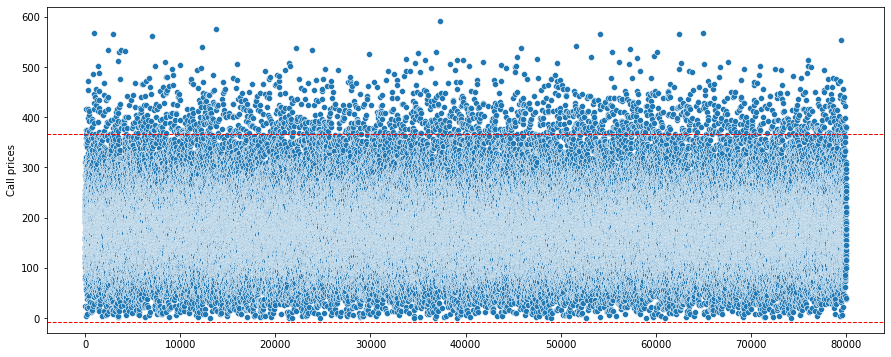

In [ ]:
plot_threshold(data, 'Call prices', 'median')

Now after a log transformation transformation:

In [ ]:
mean, std, median, MAD = get_mean_MAD(log_data, 'log_call_prices')
print(' Mean =', mean,  '    |    STD = ', std, '\n','Median =', median, '    |    MAD = ', MAD,)
mean_outliers = test_outliers(log_data, 'log_call_prices', 'mean')
median_outliers = test_outliers(log_data, 'log_call_prices', 'median')

 Mean = 5.108722466569971     |    STD =  0.5078048230963836 
 Median = 5.186953784322309     |    MAD =  0.2739116314270449


---

## 2.(4 points) Do you find evidence of clusters in the dataset ? Detail your approach?

Procedure proposal to answer this question: 

    1. We apply the k-means algorithm with a wide range of k and a sufficient value of replic to get clusterings  
    2. We use the Kneed library to find the the elbow point and so find the best number of clusters (K) 
    
At this point we know what is the best number of clusters but we don't know yet if they are significant so we need to assess them in step 3:  

    3. We generate a certain number of time K clusters by shuffling the data and compute each time their inertia  
    4. We use a statistical test to compare our real clusters inertia to the random clusters inertias and we can tell if our clustering is significantly different from a random clustering 

We will try using the k-means clustering algorithm. To compare each value of K output we will then try to minimize the aggregate distance. 

**Step 1: Getting clustering**

First we need to Standardize the variables to apply the algorithm:


In [ ]:
def standardizer(col): 
    std = np.std(col)
    mean = np.mean(col)
    return((col - mean)/ std)
data_standard = data.apply(lambda col: standardizer(col))

Now we can apply the K-mean algorithm on our standardized dataframe

In [ ]:
## Function to quickly plot any array of one dimension
def func_plot(y,x=None,xlabel=None,ylabel=None,show_mean_x=0,show_mean_y=0,ylim=None,xlim=None):
    fig, ax = plt.subplots(figsize=(20, 10))
    if x is None:
        x = range(0,np.size(y))
    
    ax.scatter(x,y,color='black')
    N = np.size(y)
    if(show_mean_y!=0): plt.plot(x,np.tile(np.mean(y,0),[N,1]),'-.b')
    if(show_mean_x!=0): plt.plot(np.tile(np.mean(x,0),[N,1]),y,'-.b')
        
    if xlabel is not None:plt.xlabel(xlabel)
    if ylabel is not None:plt.ylabel(ylabel)
    
    if ylim is None:ylim=[np.min(y)-1,np.max(y)+1]
    if xlim is None:xlim=[np.min(x)-1,np.max(x)+1]
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.show() 
    
    
## Euclidean distance
def Euclidean_dist(x1,x2):
    if(np.size(x1)!=np.size(x2)):
        sys.exit("Dimension issue")
    if(len(np.shape(x1))==1):
        euc_dist = np.sqrt(np.sum((x1-x2)**2))
    else:
        euc_dist = np.sqrt(np.sum((x1-x2)**2,axis=1))
        
    return euc_dist

def Kmeans_algo(y,nb_K,replic=5):
    N = np.size(y,0)
    if(len(np.shape(y))==1):
        y = np.array(y,ndmin=2)
    
    dimension = np.size(y,1)
    idx_save = np.zeros([N,500])
    for i in range(0,replic):
        
        ### Initialisation of the K-means algorithm
        dist = np.zeros([N,nb_K])
        mu = np.zeros([nb_K,dimension])
        
        if(nb_K>1):
            nb_init = 1000
            idx_start = np.random.randint(0,high=(nb_K-1),size=[N,nb_init])
            std_init = np.std(idx_start,axis=0)
            idx_to_select = np.argsort(std_init)
            idx = idx_start[:,idx_to_select[int(np.floor(i*nb_init/replic) + 1)]]
        else:idx = np.zeros(N)
        
        
        
        ### K-means
        convergence = 0
        idx_save[:,0] = idx
        count = 0
        while(convergence==0):
            for k in range(0,nb_K):
                if(np.sum(idx==k)>0):
                    mu[k,:] = np.mean(y[idx==k,:],axis=0)
                
            idx_prev = idx.copy()
            for k in range(0,nb_K):
                dist[:,k] = Euclidean_dist(y,np.tile(mu[k,:],[N,1]))
                
            idx = np.argmin(dist,axis=1)
            if(np.sum(idx==idx_prev)==N):
                convergence = 1
            
            count = count +1
            idx_save[:,count] = idx
        
        dist_min = 0
        inertia = 0
        for k in range(0,nb_K):
            dist_min = dist_min + np.sum(dist[idx==k,k])
            inertia = inertia + np.sum(dist[idx==k,k]**2)
            
        if(i==0):
            idx_all = idx_save[:,0:(count+1)]
            idx_best = idx
            dist_best = dist_min
            inertia_best = inertia
        elif(dist_min<dist_best):
            idx_all = idx_save[:,0:(count+1)]
            idx_best = idx
            dist_best = dist_min
            inertia_best = inertia
    
    
    return  idx_best,idx_all,dist_best,inertia_best

In [ ]:
ret_all = np.array(data_standard,ndmin=2)
dim = np.shape(ret_all)
ret = ret_all[-2:,:].transpose()
nb_stocks = np.size(ret,1)

**Step 2: Finding the elbow point**

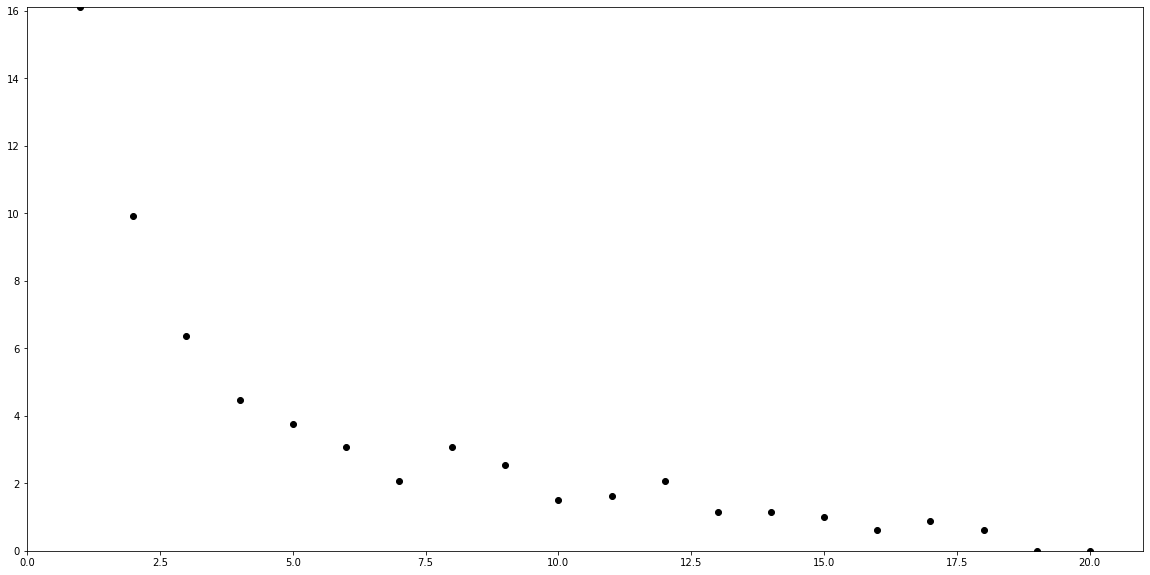

Optimal number of clusters: 7
Inertia of the optimal clustering: 1.1293881859533634


In [ ]:
## Aggregate distance per number of clusters.
def dist_per_cluster(y,max_k,replic=5):
    dist = np.zeros([max_k,1])
    for k in np.arange(1,max_k+1):
        output = Kmeans_algo(y,k,replic)
        dist[k-1] = output[2]
    
    return dist
replic = 10
dist_all = dist_per_cluster(ret,20,replic)


## Aggregate distance w.r.t. the number of clusters
func_plot(dist_all,ylim=[0,np.max(dist_all)],x=np.arange(1,np.size(dist_all)+1))

## To help find the elbow point
kl = kneed.KneeLocator(np.arange(1, np.size(dist_all)+1), dist_all[:,0], curve="convex", direction="decreasing")
k_best = kl.elbow
print("Optimal number of clusters: " + str(kl.elbow))
output_kmean_best = Kmeans_algo(ret,k_best,replic)
inertia_best = Kmeans_algo(ret,k_best,5)[3]
print("Inertia of the optimal clustering: {}".format(inertia_best))

**Step 3: Generating artificial random clustering**


In [ ]:

def random_shuffle(df, N):
    shuffled = df.sample(frac=1)
    result = np.array_split(shuffled, N)  
    return(result)

def assess_shuffle_clustering(df,N):
    for i in range(N):
        ret_all_shuffled = np.array(random_shuffle(data_standard,N)[i],ndmin=2)
        dim = np.shape(ret_all)
        ret_shuffled = ret_all_shuffled[-2:,:].transpose()
        nb_stocks = np.size(ret,1)

        dist_all_shuffled = dist_per_cluster(ret_shuffled,1,1)
        output = Kmeans_algo(y,k,replic)
        dist[k-1] = output[2]
        inertia = Kmeans_algo(ret_shuffled,1,1)[3]
    return(inertia)

Unfortunately I havn't had the time to finish this procedure so I can't tell yet if the cluster i have found are significant compared to a "naive" clustering.

## 3. (4 points) Make a scatter plot of the first two principal components ? Discuss your result.

Let's start by computing the covariance matrix of the data

In [ ]:
cov_mat = data_standard.cov()
cov_mat

,Call prices,V0,kappa,theta,sigma,rho,eta_v,rf,div,S0/K,K
Call prices,1.000013,0.502025,-0.317328,0.235511,-0.100288,0.021472,0.360731,0.041410,-0.304708,0.518531,-0.204174
V0,0.502025,1.000013,0.000863,0.001587,0.006992,0.005465,0.004051,-0.000623,0.001069,-0.004677,0.003143
kappa,-0.317328,0.000863,1.000013,0.002073,-0.005428,-0.001608,0.004306,0.002495,-0.002168,0.002526,-0.000314
theta,0.235511,0.001587,0.002073,1.000013,-0.005529,0.001861,-0.004225,-0.001696,-0.006752,0.004366,0.001589
sigma,-0.100288,0.006992,-0.005428,-0.005529,1.000013,0.006140,-0.005424,-0.002475,-0.002251,-0.001137,0.003037
rho,0.021472,0.005465,-0.001608,0.001861,0.006140,1.000013,-0.003184,-0.003222,0.002854,-0.005147,0.001975
eta_v,0.360731,0.004051,0.004306,-0.004225,-0.005424,-0.003184,1.000013,0.002107,-0.001143,0.000695,0.001252
rf,0.041410,-0.000623,0.002495,-0.001696,-0.002475,-0.003222,0.002107,1.000013,-0.244622,-0.167352,0.461130
div,-0.304708,0.001069,-0.002168,-0.006752,-0.002251,0.002854,-0.001143,-0.244622,1.000013,-0.212831,-0.528399
S0/K,0.518531,-0.004677,0.002526,0.004366,-0.001137,-0.005147,0.000695,-0.167352,-0.212831,1.000013,-0.687581


In [ ]:
lambdas, V = np.linalg.eig(cov_mat)

In [ ]:
V1 = V[:, 0]
V2 = V[:, 1]

sum_V1 = V1.sum()
normalized_V1 = V1/sum_V1
PC1 = np.matmul(data_standard, V1)

sum_V2 = V2.sum()
normalized_V2 = V2/sum_V2
PC2 = np.matmul(data_standard, V2)

PC_df = pd.DataFrame({"PC1": PC1,
                      "PC2": PC2})


Text(0, 0.5, 'PC2')

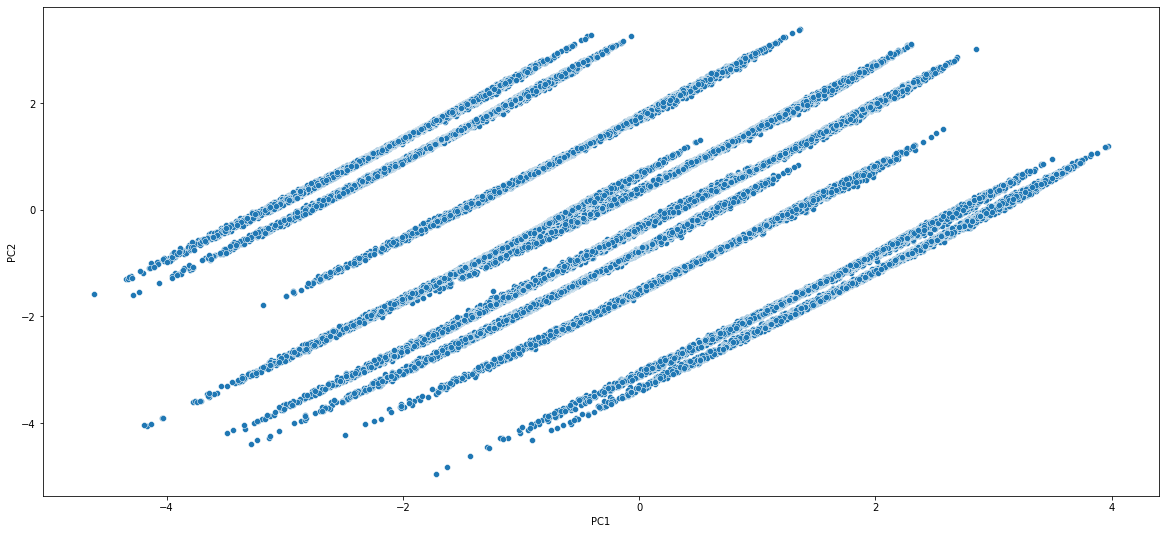

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 9))
ax = sns.scatterplot(x = PC1 ,y = PC2)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

In [ ]:
two_lambdas = lambdas[0] + lambdas[1]
print("The two first principal components account for {}% of the variance".format(round(two_lambdas/lambdas.sum()*100,2)))

The two first principal components account for 36.88% of the variance


We can clearly distinguish 10 distinct clusters, this is an insight on the relevance of clustering on this data.

Also, we can see all clusters are really following straight lines. We know the two first principal components explains the majority of the variance, so, at least for 37% of relevance we are able to find some evidence of correlation in each cluster

## 4. Take the first 5 000 observations of the dataset. Focusing on this shorter sample and using a leave-one-out cross-validation approach, find a model that delivers good ’Call prices’ predictions according to the RMSE metric. You should at least reach an RMSE below 25.

As a first approach let's consider a statistical regression with all variables:

In [ ]:
import statsmodels.api as sm
import sys

df = pd.read_excel("Heston.xlsx")

#Creating the features for the OLS 
N = len(df)
mu = df.mean(axis=0)
std = df.std(axis=0)
X = np.zeros(np.shape(df))
for i in range(11):
    X[:,i] = (np.array(df)[:,i]-mu[i])/std[i]
Y = np.copy(X[:,0])

#Selecting the first 5000 observations

X5000 = np.copy(X[:5000,1:])
Y5000 = np.copy(X[:5000,0])

## Cross-validation leave-one-out
def CV_loo(y,X):
    N = np.size(y)
    if(np.size(X,0)!=N):sys.exit("Dimension issue")
    
    residuals = np.zeros([N,1])
    for i in range(0,N):
        idx_keep = np.ones([N],dtype=bool)
        idx_keep[i] = False
       
        model = sm.OLS(y[idx_keep],X[idx_keep,:]).fit()
        prediction = model.predict(X[i,:])
        residuals[i] = y[i]-prediction
    
    
    RMSE = np.sqrt(np.mean(residuals**2))
    MAE = np.mean(np.abs(residuals))
    
    return RMSE

In [ ]:
CV_loo_RMSE = CV_loo(Y5000,X5000)
print("Using a Leave One Out Validation on an OLS we find a RMSE of : ", CV_loo_RMSE)

Using a Leave One Out Validation on an OLS we find a RMSE of :  0.36762776304490313


As we can see we have a RMSE of 0.37 > 0.25 so let's push it a bit further

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut

In [ ]:
def loo_reg(X,y):
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    residuals = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        reg = LinearRegression()
        reg.fit(X_train, y_train)
        y_test_pred = reg.predict(X_test)
        residuals.append((y_test[0] - y_test_pred[0])**2)
    RMSE = np.sqrt(np.mean(residuals))
    MAE = np.mean(np.abs(residuals))
    return(RMSE)

In [ ]:
RMSE = loo_reg(np.copy(X[:5000,1:]), np.copy(X[:5000,0]))
RMSE

0.36768407307459366

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def loo_RFE(X,y):
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    LeaveOneOut()
    residuals = []
    poly = PolynomialFeatures(degree=2)
    X_ = poly.fit_transform(X)
    y_ = poly.fit_transform([y])
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        reg = LinearRegression()
        reg.fit(X_train, y_train)
        y_test_pred = reg.predict(X_test)
        residuals.append((y_test[0] - y_test_pred[0])**2)
    RMSE = np.sqrt(np.mean(residuals))
    MAE = np.mean(np.abs(residuals))
    return(RMSE)

In [ ]:
loo_RFE(np.copy(X[:5000,1:]), np.copy(X[:5000,0]))

0.36768407307459366

No major Improvements

In [ ]:
regressors_squared = df.iloc[:,1:].apply(lambda col: col**2, axis = 1)
regressors_squared.rename(columns=lambda x: x + '_quadra', inplace=True)

In [ ]:
df_w_quadra = pd.concat([df, regressors_squared], axis = 1)

In [ ]:
X_quadra = np.zeros(np.shape(df_w_quadra))
for i in range(df_w_quadra.shape[1]):
    X_quadra[:,i] = (np.array(df_w_quadra)[:,i])
y_quadra = np.copy(X_quadra[:,0])

In [ ]:
quadra_RMSE = loo_reg(np.copy(X_quadra[:5000,1:]), np.copy(X[:5000,0]))
quadra_RMSE

0.34632084261032636

Slight improvement with a full quadratic model but still not satisfying

Let's continue with a GridseachCV to tune the selected features. We will use a f_regression feature selection method and not a mutual_info_regression because it is a really heavy computation.

Indeed for each number of selected variables (k) the model will pick these k variables among the 20 availables.

Because we are doing this for variables number from 10 to 20 this means our gridsearch will have this number of combinations:

$$ N = (\Sigma_{k=10}^{20}\binom{n}{k})$$


In [ ]:
import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def selectkbest_gridsearch(X,y):
    print(X.shape)
    
    pipeline = Pipeline(steps=[('sel', SelectKBest(score_func= f_regression) ), ('lr', LinearRegression())])

    # define the grid
    grid = dict()
    grid['sel__k'] = [i for i in range(1,20)]
    
    # define the grid search
    search = GridSearchCV(pipeline, grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=LeaveOneOut())
    
    # perform the search
    results = search.fit(Xg, yg)

    print('Search Performed')
    return(results)

In [ ]:
def print_results_skb_gs(results):
    # summarize all
    means = results.cv_results_['mean_test_score']
    params = results.cv_results_['params']    

    for mean, param in zip(means, params):
        print(">%.3f with: %r" % (mean, param))

    # Print Selected Features
    Selected_features = results.best_estimator_.named_steps['sel'].get_feature_names_out(df_w_quadra.iloc[:,1:].columns)
    print('The best config is : ', results.best_params_)
    print('Using these features : ', Selected_features)
    print('This model achieves a RMSE of: %.3f' % abs(results.best_score_))
    return(Selected_features)

In [ ]:
selected_model = selectkbest_gridsearch(X_quadra[:5000,1:], X[:5000,0])

(5000, 20)
Search Performed


In [ ]:
sf = print_results_skb_gs(selected_model)

>-49.926 with: {'sel__k': 1}
>-50.016 with: {'sel__k': 2}
>-41.009 with: {'sel__k': 3}
>-40.743 with: {'sel__k': 4}
>-33.610 with: {'sel__k': 5}
>-33.492 with: {'sel__k': 6}
>-31.417 with: {'sel__k': 7}
>-31.274 with: {'sel__k': 8}
>-25.767 with: {'sel__k': 9}
>-25.336 with: {'sel__k': 10}
>-20.408 with: {'sel__k': 11}
>-20.442 with: {'sel__k': 12}
>-20.490 with: {'sel__k': 13}
>-20.188 with: {'sel__k': 14}
>-20.220 with: {'sel__k': 15}
>-19.029 with: {'sel__k': 16}
>-19.134 with: {'sel__k': 17}
>-19.134 with: {'sel__k': 18}
>-19.148 with: {'sel__k': 19}
The best config is :  {'sel__k': 16}
Using these features :  ['V0' 'kappa' 'theta' 'eta_v' 'rf' 'div' 'S0/K' 'K' 'V0_quadra'
 'kappa_quadra' 'theta_quadra' 'sigma_quadra' 'eta_v_quadra' 'div_quadra'
 'S0/K_quadra' 'K_quadra']
This model achieves a RMSE of: 19.029


To finish let's try using a recursive feature elimination

>1 -0.732 (0.610)
>2 -0.730 (0.611)
>3 -0.727 (0.610)
>4 -0.727 (0.611)
>5 -0.702 (0.600)
>6 -0.699 (0.599)
>7 -0.589 (0.534)
>8 -0.449 (0.428)
>9 -0.448 (0.425)
>10 -0.449 (0.425)
>11 -0.355 (0.344)
>12 -0.347 (0.340)
>13 -0.256 (0.257)
>14 -0.256 (0.257)
>15 -0.256 (0.256)
>16 -0.253 (0.253)
>17 -0.243 (0.248)
>18 -0.244 (0.249)
>19 -0.241 (0.248)


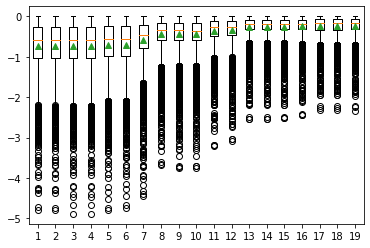

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot



# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1, 20):
		rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
		model = LinearRegression()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = LeaveOneOut()
	scores = cross_val_score(model, X, y, scoring ='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores


Xrfe , yrfe = np.copy(X_quadra[:5000,1:]), np.copy(X[:5000,0])
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, Xrfe, yrfe)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()